In [20]:
import numpy as np

A = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

print(A, "\n")
print("A.shape == ", A.shape, "\n")

it = np.nditer(A, flags=['multi_index'], op_flags=['readwrite'])
while not it.finished:
    idx = it.multi_index
    print(idx, "current value => ", A[idx])
    it.iternext()


[[1 2 3 4]
 [5 6 7 8]] 

A.shape ==  (2, 4) 

(0, 0) current value =>  1
(0, 1) current value =>  2
(0, 2) current value =>  3
(0, 3) current value =>  4
(1, 0) current value =>  5
(1, 1) current value =>  6
(1, 2) current value =>  7
(1, 3) current value =>  8


In [23]:
import numpy as np
x_data = np.array([1, 2, 3, 4, 5]).reshape(5,1) # 입력데이터 초기화
t_data = np.array([2, 3, 4, 5, 6]).reshape(5,1) # 정답데이터 초기화
W = np.random.rand(1,1) # 가중치 W 초기화
b = np.random.rand(1) # 바이어스 b 초기화


In [24]:
def loss_func(x, t):# 손실함수
 y = np.dot(x,W) + b
 return (np.sum((t - y)**2 )) / (len(x))

In [25]:
def loss_val(x,t):
    y=np.dot(x,W)+b
    return (np.sum((t-y)**2))/len(x)

In [26]:
def numerical_derivative(f, x):
 delta_x = 1e-4 # 0.0001
 grad = np.zeros_like(x) 
 it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
 while not it.finished:
        idx=it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        x[idx] = tmp_val
        it.iternext()
        return grad

In [27]:
learning_rate = 1e-2 # 학습율 α
f = lambda x : loss_func(x_data, t_data) 
print("Initial loss value = ", loss_func(x_data, t_data), "Initial W = ", W, "\n", ", b = ", b )
for step in range(6001):
 W -= learning_rate * numerical_derivative(f, W) 
 b -= learning_rate * numerical_derivative(f, b)
 if (step % 300 == 0): # 추가부분
  print("step = ", step, "loss value = ", loss_val(x_data, t_data), "W =", W, "b =", b)

Initial loss value =  3.004821909677304 Initial W =  [[0.64869001]] 
 , b =  [0.39321189]
step =  0 loss value =  1.7853883735630305 W = [[0.7623855]] b = [0.41960452]
step =  300 loss value =  0.0057577979079109515 W = [[1.04927481]] b = [0.82214585]
step =  600 loss value =  0.0007309742996667468 W = [[1.0175569]] b = [0.93662954]
step =  900 loss value =  9.279996195062892e-05 W = [[1.00625562]] b = [0.97742074]
step =  1200 loss value =  1.1781307416636987e-05 W = [[1.00222891]] b = [0.99195488]
step =  1500 loss value =  1.4956816956366062e-06 W = [[1.00079418]] b = [0.99713348]
step =  1800 loss value =  1.8988246851975446e-07 W = [[1.00028297]] b = [0.99897864]
step =  2100 loss value =  2.410630012800087e-08 W = [[1.00010082]] b = [0.99963608]
step =  2400 loss value =  3.0603863031276035e-09 W = [[1.00003592]] b = [0.99987033]
step =  2700 loss value =  3.8852765768833244e-10 W = [[1.0000128]] b = [0.9999538]
step =  3000 loss value =  4.932506090422834e-11 W = [[1.00000456]] 

In [33]:
import numpy as np
loaded_data = np.loadtxt('./titanic/data_01.csv', delimiter=',', dtype=np.float32)
x_data = loaded_data[:, 0:-1]
t_data = loaded_data[:, [-1]] 
# 데이터 차원 및 shape 확인
print("x_data.ndim = ", x_data.ndim, ", x_data.shape = ", x_data.shape)
print("t_data.ndim = ", t_data.ndim, ", t_data.shape = ", t_data.shape)

x_data.ndim =  2 , x_data.shape =  (9, 3)
t_data.ndim =  2 , t_data.shape =  (9, 1)


In [34]:
np.random.seed(42)
W = np.random.rand(3,1) # 가중치 W 초기화
b = np.random.rand(1) # 바이어스 b 초기화
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)

W =  [[0.37454012]
 [0.95071431]
 [0.73199394]] , W.shape =  (3, 1) , b =  [0.59865848] , b.shape =  (1,)


In [42]:
learning_rate = 1e-5
f = lambda x : loss_func(x_data,t_data)
print("Initial loss value = ", loss_func(x_data, t_data) )
for step in range(30001):
 W -= learning_rate * numerical_derivative(f, W) 
 b -= learning_rate * numerical_derivative(f, b)
 if (step % 300 == 0):
     print("step = ", step, "loss value = ", loss_func(x_data, t_data) )

Initial loss value =  7.58334509101228
step =  0 loss value =  7.583345067999896
step =  300 loss value =  7.5833381661353645
step =  600 loss value =  7.583331267986452
step =  900 loss value =  7.583324373551201
step =  1200 loss value =  7.58331748282747
step =  1500 loss value =  7.583310595813389
step =  1800 loss value =  7.5833037125069245
step =  2100 loss value =  7.583296832906033
step =  2400 loss value =  7.583289957008812
step =  2700 loss value =  7.5832830848131705
step =  3000 loss value =  7.583276216317182
step =  3300 loss value =  7.583269351518835
step =  3600 loss value =  7.583262490416128
step =  3900 loss value =  7.583255633007083
step =  4200 loss value =  7.583248779289702
step =  4500 loss value =  7.583241929262081
step =  4800 loss value =  7.5832350829220525
step =  5100 loss value =  7.583228240267762
step =  5400 loss value =  7.583221401297212
step =  5700 loss value =  7.583214566008419
step =  6000 loss value =  7.583207734399368
step =  6300 loss v

In [43]:
def predict(x):
    y=np.dot(x,W)+b
    return y


In [44]:
z=np.array([100,98,81])
predict(z)

array([186.14939491])

In [45]:
from scipy import stats 
x = [32,64,96,118,126,144,152,158]
y = [18,24,61.5,49,52,105,130,125]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y) # 선형 최소 제곱 회귀를 계산.
print("slope: {}\nintercept: {}\nr_value: {}\np_value: {}\nstd_err: {}"\
 .format(slope, intercept, r_value, p_value, std_err))



slope: 0.8744839346616406
intercept: -26.723837731107523
r_value: 0.8880668255497455
p_value: 0.00321829451984264
std_err: 0.18480710092393707


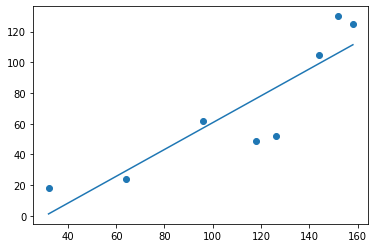

In [46]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x, slope*np.array(x) + intercept, '-')
plt.show()

In [47]:
예제2 - 다중 회귀 분석
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target
# 데이터 분핛하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# MinMaxScaler : 최대/최소값이 각각 1, 0이 되도록 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# scikit-learn 패키지를 사용하여 선형 회귀분석을 하는 경우에는 linear_model 서브 패키지의
LinearRegression 클래스를 사용핚다.
from sklearn.linear_model import LinearRegression
# 회귀분석을 하고 나면 모형 객체는 다음과 같은 속성을 가지게 된다. 또핚 fit 메서드는 객체 자싞을 반홖
model_boston = LinearRegression().fit(X_train_scaled, y_train)
print(model_boston.coef_) # coef_ : 추정된 가중치 벡터(W)
print(model_boston.intercept_) # intercept_ : 추정된 상수항(b)

SyntaxError: invalid syntax (<ipython-input-47-484900b73eed>, line 1)

In [49]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target
# 데이터 분핛하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# MinMaxScaler : 최대/최소값이 각각 1, 0이 되도록 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# scikit-learn 패키지를 사용하여 선형 회귀분석을 하는 경우에는 linear_model 서브 패키지의

from sklearn.linear_model import LinearRegression
# 회귀분석을 하고 나면 모형 객체는 다음과 같은 속성을 가지게 된다. 또핚 fit 메서드는 객체 자싞을 반홖
model_boston = LinearRegression().fit(X_train_scaled, y_train)
print(model_boston.coef_) # coef_ : 추정된 가중치 벡터(W)
print(model_boston.intercept_) # intercept_ : 추정된 상수항(b)

[-10.89821846   3.06956963  -0.75154061   3.50082433  -9.6563322
  16.96671341   0.58571427 -17.47536681   6.74419607  -4.76095948
  -9.67476531   3.56009952 -19.77032628]
29.604311867028695


In [50]:
Boston = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = Boston.data
formula = "medv~" + "+".join(boston_df.iloc[:, :-1].columns)
formula

NameError: name 'sm' is not defined

In [51]:
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = Boston.data
formula = "medv~" + "+".join(boston_df.iloc[:, :-1].columns)
formula


'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [52]:
from patsy import dmatrices # 디자인 행렬 수행
# boston_df에서 formula에서 정의하지 않은 요소는 y(종속변수:medv컬럼)에
# 정의핚 요소는 X(독립변수:나머지)에 저장
# dmatrices()를 이용해서 boston_df에서 종속변수와 독립변수를 분리하는 작업 수행
y, X = dmatrices(formula, boston_df, return_type="dataframe")
import pandas as pd
vif = pd.DataFrame()

In [53]:
X.shape


(506, 14)

In [54]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)
# Ridge Regression 모델
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) # 하이퍼 파라미터
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)


0.4384009113704955

In [55]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0) # 하이퍼 파라미터
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.37914194389255096

In [56]:
# Elastic-net Regression 모델
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5) # 하이퍼 파라미터
elastic.fit(X_train, y_train)
elastic.score(X_test, y_test)

-0.0044383730131891674

In [57]:
X_train


array([[-0.00551455, -0.04464164,  0.04229559, ..., -0.03949338,
         0.05228   ,  0.02791705],
       [ 0.06350368, -0.04464164, -0.05039625, ...,  0.02360753,
         0.05803913,  0.04034337],
       [ 0.0090156 , -0.04464164,  0.05522933, ...,  0.02323852,
         0.05568355,  0.10661708],
       ...,
       [ 0.03081083, -0.04464164, -0.02021751, ..., -0.03949338,
        -0.01090444, -0.0010777 ],
       [-0.01277963, -0.04464164, -0.02345095, ..., -0.00259226,
        -0.03845911, -0.03835666],
       [-0.09269548, -0.04464164,  0.02828403, ..., -0.03949338,
        -0.00514531, -0.0010777 ]])

In [58]:
data.info()

AttributeError: info

In [59]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [60]:
data.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

In [61]:
data.data.shape

(442, 10)

In [62]:
data.target


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [63]:
data.key()

AttributeError: key

In [64]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [65]:
data.data.DESCR

AttributeError: 'numpy.ndarray' object has no attribute 'DESCR'

In [67]:
# 정규화 선형회귀 모델별 가중치(계수) 비교
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
# 선형 모델을 비교하기 위해 생성
linear = LinearRegression()
linear.fit(X_train, y_train)
# 계수를 핚 문에 비교하기 위핚 DataFrame
coefs = np.vstack((linear.coef_, ridge.coef_, lasso.coef_, elastic.coef_))
index = ['linear', 'ridge', 'lasso', 'elastic']
coefs_df = pd.DataFrame(coefs, columns=data.feature_names, index=index)
print("정규화 선형회귀 모댈별 가중치(계수) 비교")
coefs_df

정규화 선형회귀 모댈별 가중치(계수) 비교


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
linear,47.746571,-241.991804,531.968569,381.565299,-918.490206,508.251474,116.940405,269.485086,695.806221,26.323431
ridge,50.551555,-67.722365,278.300728,197.624014,-6.245973,-26.226985,-151.394518,120.323196,215.854694,101.755543
lasso,0.000000,-0.000000,398.384368,46.178843,0.000000,0.000000,-0.000000,0.000000,238.187402,0.000000
elastic,0.413088,0.000000,3.298991,2.256939,0.339380,0.080784,-1.874661,2.143869,2.947964,1.701981


In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline
# boston 데이타셋 로드
boston = load_boston()
# boston 데이타셋 DataFrame 변홖
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


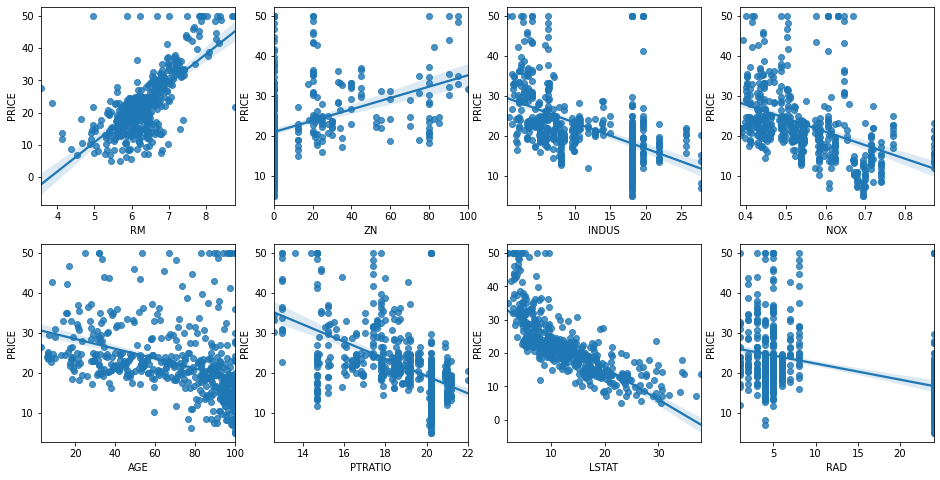

In [73]:
import seaborn as sns
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])
